### Machine Learning 

Machine learning can be simply characterized as building models of data. The process of machine learning through there mathematical models can help us better understand our data. The learning component of the process involves tuning parameters of these mathematical models. Understanding the categorization of models and their appropriate application by problem type is essential to proper use. The two broadest categories of machine learning are $unsupervised$ and $supervised$ learning.  

Supervised learning involves modeling the association of data and labels for each sample in that data. There are two subtypes of supervised learning bieng classification and regression based on the types of labels. Classification involves labels that discrete categories (e.g.. healthy and sick patients) while regression involves continuous labels (e.g. pH). 

Unsupervised learning requires no labels and focuses on reducing the dimensionality of data to a form that can be visualized by humans (i.e. less than 4 dimensions). This often determine how the data is grouping in a way that has as little bias as possible. 


In [1]:
import pandas as pd
from IPython.display import display_html 

To explore these ideas in more concrete terms we will look at a fun and simple example. In the next sections, we will expand to more complex biological data. For this example, we will look at a collection of famous paintings with the face of Rowan Atkinson.



![title](images/introduction/bean.png)


In particular, we will use a dataset that consists of paintings (numbered 1 to 22) by color where the entries are the proportion of each color in each painting (i.e. rows sum to 1). To import this data and manipulate it for machine learning we use [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html). A large component of bioinformatics and data science is data manipulation and pandas is a powerful tool for that. First, we will simply import and view a few columns (paintings) to understand the dataset better.  


In [2]:
# import data
table = pd.read_csv('data/introduction/color-table.tsv',
                    sep='\t', index_col=0).astype(float)
table.columns = table.columns.astype(str)
# view tables (just first two samples)
caption_1 = 'A table of paintings with the composition of colors:'
table.head(6)


,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
SampleID,,,,,,,,,,,,,,,,,,,,,
Black,0.125,0.143,0.147,0.164,0.197,0.157,0.153,0.115,0.178,0.164,...,0.155,0.126,0.199,0.163,0.136,0.184,0.169,0.146,0.200,0.135
White,0.243,0.224,0.231,0.209,0.151,0.256,0.232,0.249,0.167,0.183,...,0.251,0.273,0.170,0.196,0.185,0.152,0.207,0.240,0.172,0.225
Blue,0.153,0.111,0.058,0.120,0.132,0.072,0.101,0.176,0.048,0.158,...,0.091,0.045,0.080,0.107,0.162,0.110,0.111,0.141,0.059,0.217
Red,0.031,0.051,0.129,0.047,0.033,0.116,0.062,0.025,0.143,0.027,...,0.085,0.156,0.076,0.054,0.020,0.039,0.057,0.038,0.120,0.019
Yellow,0.181,0.159,0.133,0.178,0.188,0.153,0.170,0.176,0.118,0.186,...,0.161,0.131,0.158,0.144,0.193,0.165,0.156,0.184,0.136,0.187
Other,0.266,0.313,0.303,0.282,0.299,0.246,0.282,0.259,0.347,0.281,...,0.257,0.269,0.318,0.335,0.304,0.350,0.300,0.250,0.313,0.217


## Unsupervised Learning

Using unsupervised learning. In this case, we may want to understand how each painting may separate based on the composition of color. We will cover the methodology for a type of unsupervised learning called dimensionality reduction in later sections. For now, we will simply explain a common output of these methods called a biplot. In this plot the greater the spatial distance between dots (which represent paintings) the larger difference there is between their color composition and the closer the spatial distance the more similar. The arrows represent the colors (features) and the distance from the center of the plot represents the weight (i.e. importance) of that feature and the direction represents that arrow/color and painting association. Each axis in the plot explains a percentage of the total variance within the whole dataset (this very rarely sums to one in practice).




In [3]:
# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import to_hex
# a helper for now (we will go in depth later)
from helper.introduction import apca, draw_painting_biplot

# set label font-sizes globally
paper_rc = {'lines.linewidth': 2, 
            'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)   
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.style.use('ggplot')
%matplotlib inline

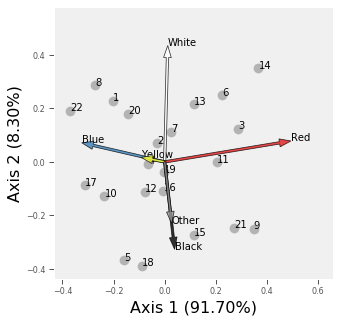

In [4]:
# Perform Aitchison PCA
ordination = apca(table.astype(float))
# Style and draw the biplot, using the first and second principal components
# https://github.com/jupyter/notebook/issues/3523#issuecomment-534379015
draw_painting_biplot(ordination, "Axis 1", "Axis 2")


## Supervised Learning

From this biplot, we can see the largest difference between paintings color compositions can be explained by the blue and red colors. Based on this we can group painting by the amount of red and the amount of blue. We can then attempt to $classify$ the painting based on the amount of red in the painting. Here, we will not go into depth about the different forms of classification but rather just visualize the classification boundary. In this visualization, is colored by the classifier prediction (i.e. redder shading indicated higher confidence in a painting have more red than blue and visa versa). The classification boundary is the region in the plot where the shading is not blue or red and therefore there is high uncertainty in the prediction of the classifier. Understanding uncertainty is an important aspect of machine learning (in particular supervised) and we will cover this in detail in later sections. 



In [5]:
from helper.introduction import regression_example
from helper.introduction import classifier_example

In [6]:

# remove blue (hidden)
table_no_red = table.T.drop(['Red'],axis=1)
# class
more_blue = [22, 8, 1, 20, 17, 7, 10, 12, 5, 18, 2, 19, 16, 4]
more_red = [15, 11, 21, 9, 3, 13, 6, 14]
classify = [1 if int(v) in more_blue else 0 for v in table.columns]
mf = pd.DataFrame(classify, table.columns, ['more_red'])
mf.head(3)


,more_red
SampleID,
1,1
2,1
3,0


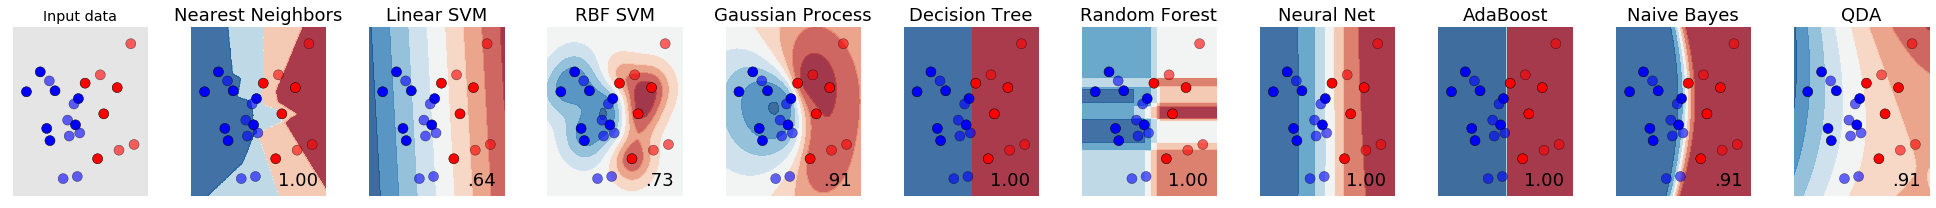

In [7]:
ax = classifier_example(table_no_red, mf)
plt.show()


Another form of machine learning is regression. The most common and simple form of regression is likely linear regression. This involves estimating the parameters in a linear equation that can be used to predict the values of one variable based on the other. In this example, we can perform linear regression on the percentage of red in a painting based on the percentage of blue or visa versa. We can also see that there is a negative relationship between red and blue. This follows based on the biplot because the red and blue arrows were pointing in opposite directions. 


Coefficients: 
 [-0.9813393]
Mean squared error: 0.00
Coefficient of determination: 0.69


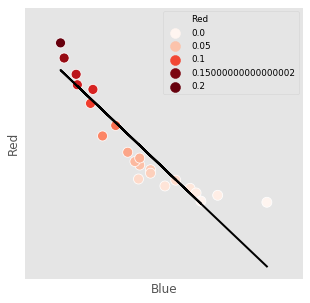

In [10]:
ax = regression_example(table.T)
plt.show()


In the following sections we explore these concepts further and describe common techniques in the context of machine learning in biological datasets. 
